### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### Datasets Information:

- Data.csv: It contains information of ratings given by the users to a particular movie. Columns: user id, movie id, rating, timestamp

- item.csv: File contains information related to the movies and its genre.

- Columns: movie id, movie title, release date, unknown, Action, Adventure, Animation, Children’s, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western

- user.csv: It contains information of the users who have rated the movies. Columns: user id, age, gender, occupation, zip code

### Objective:

`To implement the techniques learnt as a part of the course.`

### Learning Outcomes:
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


#### Domain 
`Internet and Entertainment`

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

In [ ]:
#ok

#### 1. Import the necessary packages - 2.5 marks

In [36]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from scipy.stats import skew, norm, probplot, boxcox, f_oneway
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler

pd.

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [121]:
df_data = pd.read_csv('data.csv')
df_item = pd.read_csv('item.csv')
df_user = pd.read_csv('user.csv')


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [51]:
print('******************** data.csv ****************************************')
print('Output of info() on data.csv:')
print(df_data.info())
print()
print('Shape of data.csv is:')
print(df_data.shape)
print()
print('Describe of data.csv:')
print (df_data.describe())
print()
print('Missing value in data.csv:')
print (pd.DataFrame( df_data.isnull().sum(), columns= ['Number of missing values']))
print()
print('******************** item.csv ****************************************')
print('Output of info() on item.csv:')
print(df_item.info())
print()
print('Shape of item.csv is:')
print(df_item.shape)
print()
print('Describe of item.csv:')
print (df_item.describe())
print()
print('Missing value in item.csv:')
print(pd.DataFrame( df_item.isnull().sum(), columns= ['Number of missing values']))
print()
print('******************** user.csv ****************************************')
print('Output of info() on user.csv:')
print(df_user.info())
print()
print('Shape of user.csv is:')
print(df_user.shape)
print()
print('Describe of user.csv:')
print (df_user.describe())
print()
print('Missing value in user.csv:')
print(pd.DataFrame( df_user.isnull().sum(), columns= ['Number of missing values']))

******************** data.csv ****************************************
Output of info() on data.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user id      100000 non-null int64
movie id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB
None

Shape of data.csv is:
(100000, 4)

Describe of data.csv:
            user id       movie id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000  8.828269e+08
75%       682.00000     631.000000       4.000000  8.882600e+08
max       943.00000    1682.000000   

#### 4. Find the number of movies per genre using the item data - 2.5 marks

In [127]:
# use sum on the default axis

#df_movie_dupes = df_item[df_item.duplicated(subset=["movie title","release date"])]
#print(df_movie_dupes)

df_unique = df_item.drop_duplicates(subset=["movie title","release date"], keep='first')

df_genres = df_unique.drop(columns=['movie id','movie title','release date'])

df_genres.sum(axis=0)

unknown          1
Action         249
Adventure      133
Animation       42
Childrens      120
Comedy         502
Crime          107
Documentary     50
Drama          716
Fantasy         22
Film-Noir       24
Horror          90
Musical         56
Mystery         60
Romance        244
Sci-Fi         100
Thriller       248
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 5 marks

In [275]:
#hint: use sum on the axis = 1

#removing 'release date' and 'movie id' columns for readability purposes
df_titles = df_unique.drop(columns=['release date', 'movie id'])
df_titles['all_genres'] = df_titles.iloc[:,1:20].sum(axis=1)

df5 = df_titles[df_titles['all_genres'] > 1]
df5

#print(df_titles[df_titles['all_genres'] > 1])

,movie title,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year,all_genres
0,Toy Story,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1995,3
1,GoldenEye,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1995,3
3,Get Shorty,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1995,3
4,Copycat,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,1995,3
6,Twelve Monkeys,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1995,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,Nothing Personal,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1997,2
1667,MURDER and murder,0,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1997,3
1668,Tainted,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1998,2
1671,Mirage,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1995,2


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [276]:
#delete where 'unknown' >=1

df_known_genres = df_titles[df_titles.unknown ==0]
df_known_genres

,movie title,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year,all_genres
0,Toy Story,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1995,3
1,GoldenEye,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1995,3
2,Four Rooms,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1995,1
3,Get Shorty,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1995,3
4,Copycat,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,1995,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,Sweet Nothing,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1996,1
1676,Mat' i syn,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1998,1
1677,B. Monkey,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1998,2
1679,You So Crazy,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1994,1


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [3]:
# HINT: use distplot for age and countplot for gender,ratings,occupation, release year.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below.

In [129]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


******************* Distribution of age *******************


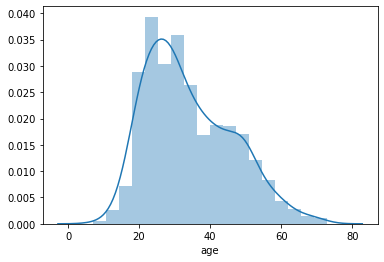

In [137]:
#your answers here
## Distribution Plot of age
print('******************* Distribution of age *******************')
sns.distplot(df_user['age'])

******************* Gender Histogram *******************


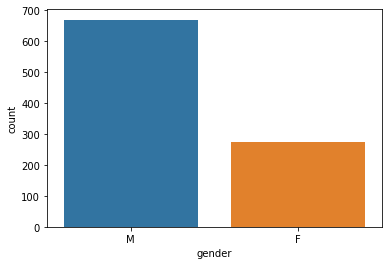

In [138]:
print('******************* Gender Histogram *******************')
sns.countplot(x='gender', data=df_user)

******************* Gender Histogram *******************


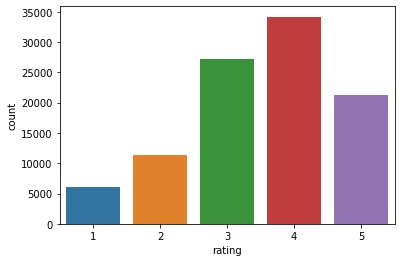

In [141]:
print('******************* Rating Histogram *******************')
sns.countplot(x='rating', data=df_data)

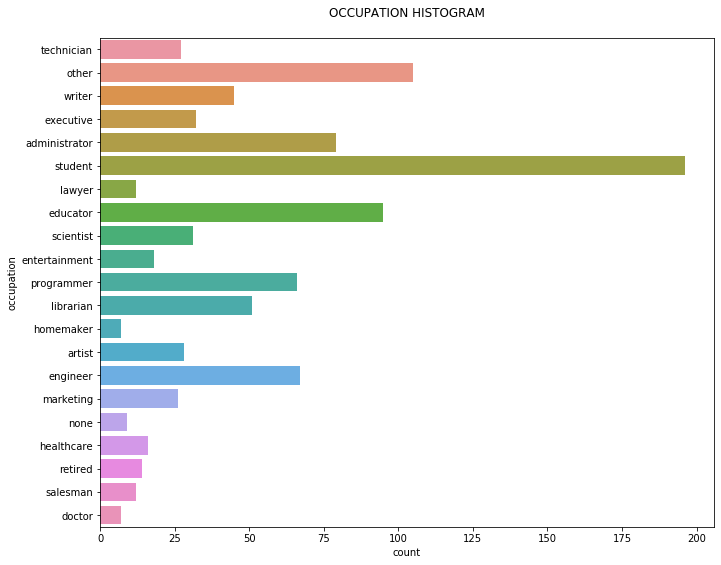

In [202]:

fig, ax = plt.subplots(figsize=(11, 9))
sns.countplot(y='occupation', data=df_user)
title = 'Occupation Histogram\n'.upper()
plt.title(title, loc='center')
plt.show()

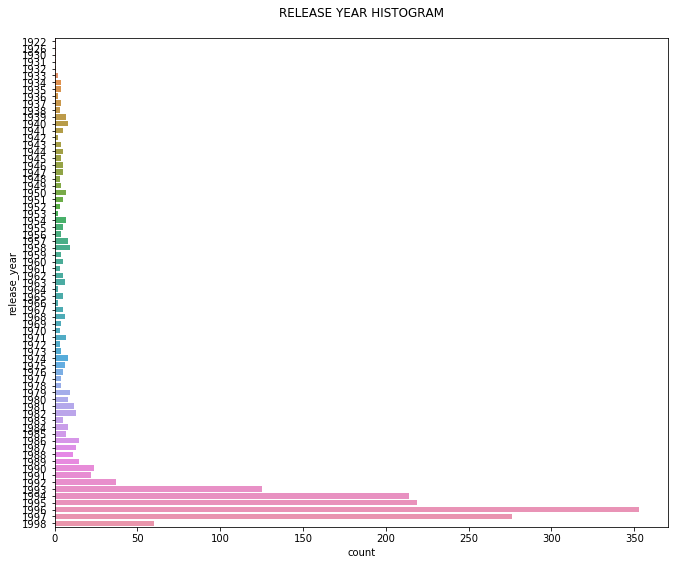

In [203]:
def extract_year(releasedate_str):
    return releasedate_str.split('-')[2]

df_unique["release_year"] = df_unique['release date'].apply(extract_year)

fig, ax = plt.subplots(figsize=(11, 9))
sns.countplot(y='release_year', data=df_unique)

title = 'Release Year Histogram\n'.upper()
plt.title(title, loc='center')
plt.show()

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use multiple bivariate plots or can use the heatmap to visualise all the changes over the years in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [162]:
#Your answer here

print('Step 1: create pivot table depicting total of genre by year')
df_popularity = pd.pivot_table(df_unique, 
               index='release_year', 
               values=['Action','Adventure','Animation','Childrens','Comedy','Crime',
                       'Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery',
                       'Romance','Sci-Fi','Thriller','War','Western'],
              aggfunc=sum)

#df_popularity.head(20)
df_popularity.tail(20)

Step 1: create pivot table depicting total of genre by year


,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,
1979,2,1,0,0,3,0,0,3,0,0,2,0,1,1,3,1,1,0
1980,2,1,0,0,3,0,0,3,0,0,2,1,0,2,1,0,1,0
1981,6,4,2,1,2,1,0,2,0,0,4,0,1,1,2,2,0,0
1982,1,1,0,1,3,0,0,6,1,1,2,3,0,1,3,0,1,0
1983,1,0,0,0,1,0,1,1,0,0,2,0,0,0,0,0,1,0
1984,2,1,0,0,1,1,0,5,0,0,1,1,1,0,2,2,1,0
1985,0,0,0,0,3,0,0,3,0,0,0,0,0,1,2,1,1,0
1986,5,3,1,1,3,0,0,8,0,0,2,0,0,2,3,2,3,0
1987,3,2,0,0,8,0,0,5,1,0,3,1,0,4,0,1,1,0


******************************************************
Step 2: create nice picture showing relationship


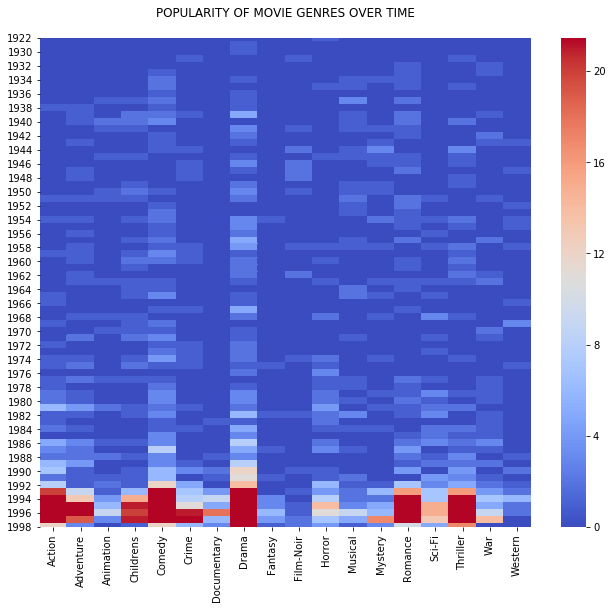

In [177]:
print('******************************************************')
print('Step 2: create nice picture showing relationship')

fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_popularity, cmap='coolwarm', robust=True)

title = 'Popularity of Movie Genres over time\n'.upper()
plt.title(title, loc='center')
plt.ylabel('')
plt.show()

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 

1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie id in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the ids and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [211]:
#your answer here

#step 1: get the list of movies that have more than 100 ratings
df_top_ratings = df_data.groupby("movie id").agg({"rating":"count"}).sort_values(by='rating', ascending=False)

df_top100 = df_top_ratings.query('rating>=100')

top100_movieids = df_top100.values.tolist()

#step 2: get average rating of movies
df_avg_ratings = df_data.groupby('movie id').agg({"rating":"mean"}).sort_values(by='rating', ascending=False)

df_top25 = df_avg_ratings.nlargest(25,'rating')

#mash them up!
df_top25.isin(top100_movieids)

,rating
movie id,
814,False
1599,False
1201,False
1122,False
1653,False
1293,False
1500,False
1189,False
1536,False


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [274]:

#df_user has 'user id' and 'gender' ~943 rows = the population of users
#df_date has 'movie id', 'user id' and 'rating' ~10k rows => users have many reviews
#df_unique has 'movie id' and the genres (Drama, Sci-Fi, Romance) ~1681 rows = the list of movies

#need to merge these 2 dataframes to  to have 'movie id', 'user id', 'gender', and 'rating' all together

df_ud = df_data.merge(df_user,how='left', left_on='user id', right_on='user id', sort=True)

df_udm = df_ud.merge(df_unique, how='left', left_on='movie id', right_on='movie id', sort=True)

#clean up the dataset
df_udm.drop(inplace=True, 
            columns=['timestamp','age','occupation','zip code','release date','unknown','Action',
                     'Adventure','Animation','Childrens','Comedy','Crime','Documentary',
                     'Fantasy','Film-Noir','Horror','Musical','Mystery','Thriller','War','Western','release_year'])


index_names = df_udm[ (df_udm["Drama"] == 0) & (df_udm['Romance'] ==0) & (df_udm['Sci-Fi'] ==0)].index
df_udm.drop(index_names, inplace=True)

df_udm.dropna(inplace=True)

# calculate the fraction by dividing the ratings given to a genre by a gender 
# divided by the total ratings given by the gender.

# this calculates total ratings given by a gender (the denominator)
#df_denominator = df_udm.groupby("gender").agg({"rating":"count"}).rename(columns={'rating' : 'total_ratings'})
#the above is not accurate because some movies are classified as more than just 1 genre, meaning they can be classified as drama and romance

#calc male drama, female drama
df_drama_num = df_udm[(df_udm["Drama"] == 1)].groupby(["gender"]).agg({"rating":"count"}).rename(columns={'rating' : 'drama_ratings'})


#calc male female romance
df_rom_num = df_udm[(df_udm["Romance"] == 1)].groupby(["gender"]).agg({"rating":"count"}).rename(columns={'rating' : 'romance_ratings'})

#calc male female sci-fi
df_sc_num = df_udm[(df_udm["Sci-Fi"] == 1)].groupby(["gender"]).agg({"rating":"count"}).rename(columns={'rating' : 'scifi_ratings'})

#merge them all together
df_totals = pd.concat([df_drama_num, df_rom_num, df_sc_num], axis=1, sort=False)
df_totals["total_ratings"] = df_totals.sum(axis=1)

df_totals.join(df_totals.div(df_totals['total_ratings'], axis=0), rsuffix='_perc')


,drama_ratings,romance_ratings,scifi_ratings,total_ratings,drama_ratings_perc,romance_ratings_perc,scifi_ratings_perc,total_ratings_perc
gender,,,,,,,,
F,10891,5797,2625,19313,0.563921,0.300161,0.135919,1.0
M,28555,13406,10069,52030,0.548818,0.257659,0.193523,1.0


#Summary of Findings
1. Hypothesis 1: Men watch more dramas than women. Approximately 56% of female reviews were for dramas, and 54% of males reviews were for dramas. So, the first hyptothesis is false, men do NOT watch more dramas than women.
2. Hypothesis 2: Women watch more sci-fi than men. This is also not true; approximately 14% of female reviews were on sci-fi whereas 19% of male reviews were for sci-fi films.
3. Hypothesis 3: Men watch more romance than women. Approximately 30% of female reviews were for romance, whereas 26% of male review were for romance. So again, this hypothesis was also false.